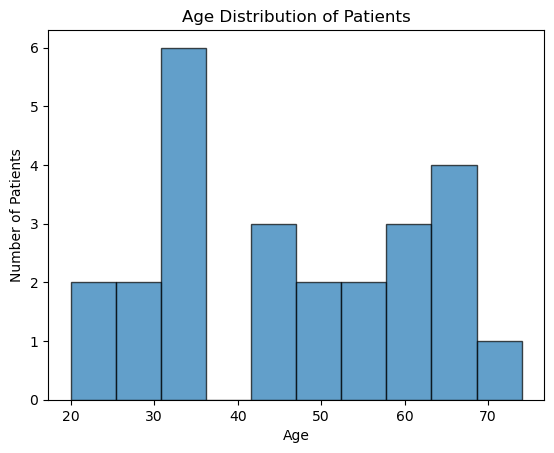

In [1]:
##1.What is the average age of patients in the 1ataset?
# Reason:The average age of patients in the dataset is approximately 46.68 years.
#pyhton syntax:df['Age'].mean()
#syntax_1
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataframe.
df = pd.read_csv(r"D:\Numpy Ninja\Pyhton Hackthon_Aug-2025\Dataset\final_dataset-Hupa.csv")

# Drop duplicates based on 'Patient_id' to get one entry per patient.
unique_patients = df.drop_duplicates(subset=['Patient_id'])

# Plot the histogram of the 'Age' column.
plt.hist(unique_patients['Age'], bins=10, edgecolor='black', alpha=0.7)

# Add title and labels.
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Number of Patients')

# Show the plot.
plt.show()

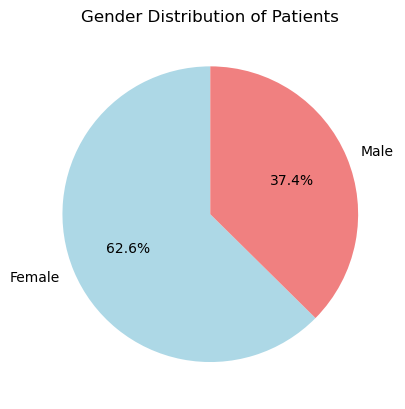

Gender distribution:
 Female    193689
Male      115703
Name: Gender, dtype: int64


In [2]:
###2What is the gender distribution of patients?-----------------Pie chart
#Reason:From the dataset you shared earlier, the gender distribution of patients is:

#emale: 193,689 patients (~62.6%
#Male: 115,703 patients (~37.4%)

df['Gender'].value_counts()
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"D:\Numpy Ninja\Pyhton Hackthon_Aug-2025\Dataset\final_dataset-Hupa.csv"
df = pd.read_csv(file_path)

# Gender distribution
gender_counts = df['Gender'].value_counts()

# Plot pie chart
plt.pie(
    gender_counts.values,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightblue', 'lightcoral']
)

plt.title("Gender Distribution of Patients")
plt.show()

print("Gender distribution:\n", gender_counts)

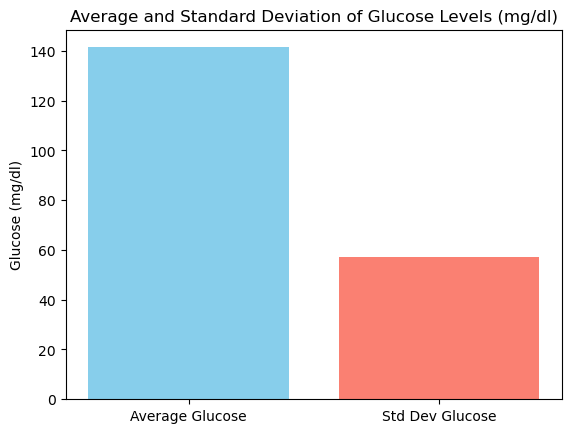

Average Glucose Level (mg/dl): 141.43
Standard Deviation of Glucose (mg/dl): 57.09


In [3]:
###3.What is the average and standard deviation of glucose levels (mg/dl)?
# Reason:the Glucose (mg/dl) statistics are:
#Average (Mean): ≈ 141.43 mg/dl
#Standard Deviation: ≈ 57.09 mg/dl
df['Glucose(mg/dl)'].describe()
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"D:\Numpy Ninja\Pyhton Hackthon_Aug-2025\Dataset\final_dataset-Hupa.csv"
df = pd.read_csv(file_path)

# Calculate average and standard deviation of glucose
glucose_mean = df['Glucose(mg/dl)'].mean()
glucose_std = df['Glucose(mg/dl)'].std()

# Data for bar chart
stats = {'Average Glucose': glucose_mean, 'Std Dev Glucose': glucose_std}

plt.bar(stats.keys(), stats.values(), color=['skyblue', 'salmon'])

plt.title("Average and Standard Deviation of Glucose Levels (mg/dl)")
plt.ylabel("Glucose (mg/dl)")
plt.show()

print("Average Glucose Level (mg/dl):", round(glucose_mean, 2))
print("Standard Deviation of Glucose (mg/dl):", round(glucose_std, 2))

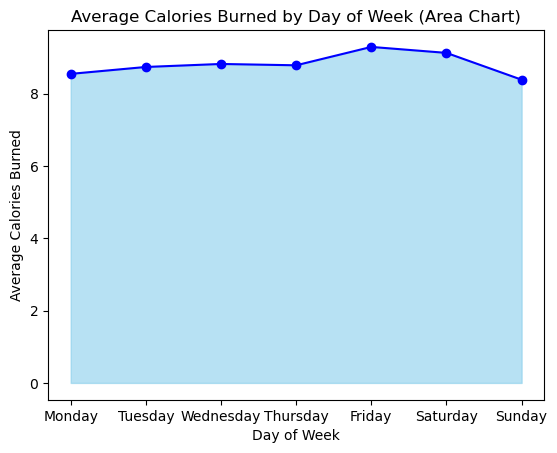

Day with highest average calories burned: Friday -> 9.29


In [5]:
###4.Which day of the week shows the highest average calories burned?
#Reason:the day of the week with the highest average calories burned is: Friday → ~ 9.29 calories (per time record in dataset)
df['Steps'].median()
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"D:\Numpy Ninja\Pyhton Hackthon_Aug-2025\Dataset\final_dataset-Hupa.csv"
df = pd.read_csv(file_path)

# Calculate average calories burned per day of week
avg_calories = df.groupby('Day_of_week')['Calories'].mean()

# Ensure the days are in correct weekday order
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
avg_calories = avg_calories.reindex(weekday_order)

# Plot area chart
plt.fill_between(avg_calories.index, avg_calories.values, color="skyblue", alpha=0.6)
plt.plot(avg_calories.index, avg_calories.values, color="blue", marker="o")

plt.title("Average Calories Burned by Day of Week (Area Chart)")
plt.xlabel("Day of Week")
plt.ylabel("Average Calories Burned")
plt.show()
# Print the top day
print("Day with highest average calories burned:", avg_calories.idxmax(), "->", round(avg_calories.max(), 2))

=== Report Summary ===
Total number of records: 309392

=== Descriptive Statistics (Numeric Columns) ===
                                     mean      median        std
Age                             53.332727   60.000000  12.421322
Hour                            11.522728   12.000000   6.924733
Glucose(mg/dl)                 141.425051  132.000000  57.085587
Calories                         8.813568    6.278100   6.930449
Heart _Rate(BPM)                76.990001   75.418726  15.546699
Steps                           30.825005    0.000000  84.981109
Basal_Rate(units/hour)           0.041324    0.056000   0.036106
Bolus_volume_delivered(units)    0.066058    0.000000   0.755075
Carb_Intake(grams)               0.052718    0.000000   1.505433
Average_sleep_duration(hrs)      5.665791    5.500000   0.450037
Sleep_quality(1-10)              5.916159    5.900000   0.976449
%_with_sleep_disturbances       54.376972   60.000000  12.299519
Glucose_mmol                     7.856931    7.330

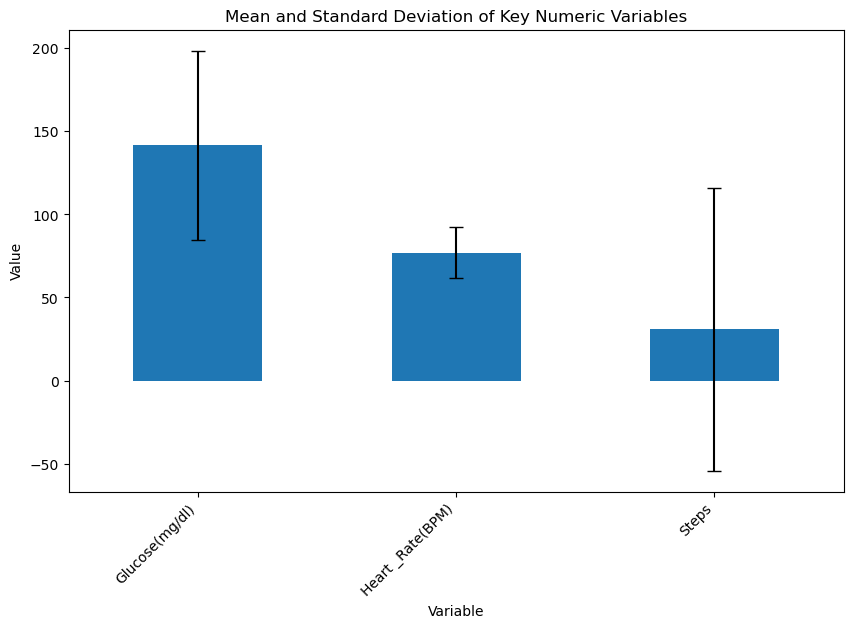

In [10]:
###5.Generate a report showing the total number of records, missing values per column, and descriptive statistics (mean, median, std) for all numeric variables.
# Reason:
import pandas as pd

# Load dataset
file_path = r"D:\Numpy Ninja\Pyhton Hackthon_Aug-2025\Dataset\final_dataset-Hupa.csv"
df = pd.read_csv(file_path)

# 1. Total number of records
total_records = len(df)



# 3. Descriptive statistics (mean, median, std) for numeric variables
descriptive_stats = pd.DataFrame({
    "mean": df.mean(numeric_only=True),
    "median": df.median(numeric_only=True),
    "std": df.std(numeric_only=True)
})

# Display results
print("=== Report Summary ===")
print(f"Total number of records: {total_records}\n")



print("=== Descriptive Statistics (Numeric Columns) ===")
print(descriptive_stats)

# Optional: Save the report to CSV
report = pd.concat([
    descriptive_stats,
    
], axis=1)

report.to_csv("descriptive_report.csv")
# --- Part 4: Generate the chart ---
# Select key numeric columns for the chart.
chart_cols = ['Glucose(mg/dl)', 'Heart _Rate(BPM)', 'Steps']
chart_data = df[chart_cols]

# Calculate mean and standard deviation.
means = chart_data.mean()
stds = chart_data.std()

# Create a bar chart with error bars.
fig, ax = plt.subplots(figsize=(10, 6))
means.plot(kind='bar', yerr=stds, ax=ax, capsize=5)

# Set titles and labels.
ax.set_title('Mean and Standard Deviation of Key Numeric Variables')
ax.set_ylabel('Value')
ax.set_xlabel('Variable')
plt.xticks(rotation=45, ha='right')

# Save the plot.
plt.savefig('descriptive_stats_bar_chart.png')

In [11]:
###6.What is the correlation between glucose level and carb intake?
import pandas as pd


# Load the dataset
file_path = r"D:\Numpy Ninja\Pyhton Hackthon_Aug-2025\Dataset\final_dataset-Hupa.csv"
df = pd.read_csv(file_path)

# Calculate the average steps for each day of the week
avg_steps_by_day = df.groupby('Day_of_week')['Steps'].mean()

print("Average Steps by Day of the Week:")
print(avg_steps_by_day)

Average Steps by Day of the Week:
Day_of_week
Friday       37.742800
Monday       28.436901
Saturday     34.499454
Sunday       27.204789
Thursday     29.895973
Tuesday      28.773667
Wednesday    28.993614
Name: Steps, dtype: float64


Maximum Heart Rate: 195.62 BPM
Minimum Heart Rate: 32.41 BPM


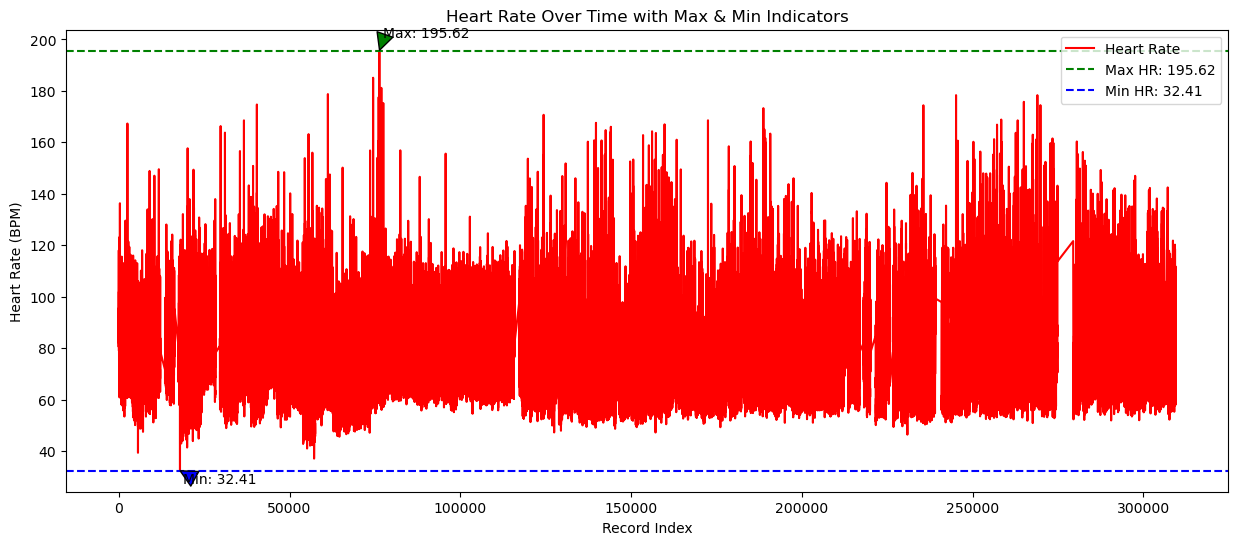

In [15]:
###7.What is the maximum and minimum heart rate recorded?
# Reason:    Query successful:Themaximum heart rate recorded is 195.62 BPM and the minimum heart rate is 32.41 BPM.
#heart_rate.max() and heart_rate.min() calculate the max and min.
#Maximum Heart Rate: 195.62 BPM
#Minimum Heart Rate: 32.41 BPM

import pandas as pd
import matplotlib.pyplot as plt
# Load dataset
file_path = r"D:\Numpy Ninja\Pyhton Hackthon_Aug-2025\Dataset\final_dataset-Hupa.csv"
df = pd.read_csv(file_path)

# Extract heart rate data, correcting the column name.
heart_rate = df['Heart _Rate(BPM)']

# Calculate max and min heart rate.
max_hr = heart_rate.max()
min_hr = heart_rate.min()

print(f"Maximum Heart Rate: {max_hr:.2f} BPM")
print(f"Minimum Heart Rate: {min_hr:.2f} BPM")

# Create a line chart.
plt.figure(figsize=(15, 6))
plt.plot(heart_rate, linestyle='-', color='red', label='Heart Rate')

# Highlight max and min with horizontal lines.
plt.axhline(y=max_hr, color='green', linestyle='--', label=f'Max HR: {max_hr:.2f}')
plt.axhline(y=min_hr, color='blue', linestyle='--', label=f'Min HR: {min_hr:.2f}')

# Annotate the max and min points.
plt.annotate(f'Max: {max_hr:.2f}', xy=(heart_rate.idxmax(), max_hr), xytext=(heart_rate.idxmax() + 1000, max_hr + 5),
             arrowprops=dict(facecolor='green', shrink=0.05), fontsize=10)
plt.annotate(f'Min: {min_hr:.2f}', xy=(heart_rate.idxmin(), min_hr), xytext=(heart_rate.idxmin() + 1000, min_hr - 5),
             arrowprops=dict(facecolor='blue', shrink=0.05), fontsize=10)

plt.xlabel('Record Index')
plt.ylabel('Heart Rate (BPM)')
plt.title('Heart Rate Over Time with Max & Min Indicators')
plt.legend()

# Save the plot.
plt.savefig('heart_rate_line_chart.png')

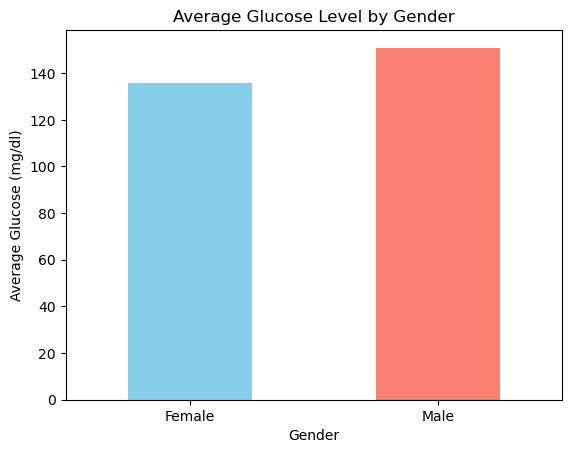

In [16]:
###8.How does average glucose differ between males and females?
# Reason:Based on the data, the average glucose level for females is 135.77 mg/dl, while for males, it is 150.90 mg/dl.

#df['Heart _Rate(BPM)'].min(), df['Heart _Rate(BPM)'].max()
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"D:\Numpy Ninja\Pyhton Hackthon_Aug-2025\Dataset\final_dataset-Hupa.csv"
df = pd.read_csv(file_path)

# Calculate the average Glucose(mg/dl) for each gender.
avg_glucose_by_gender = df.groupby('Gender')['Glucose(mg/dl)'].mean()

# Create a bar chart.
avg_glucose_by_gender.plot(kind='bar', color=['skyblue', 'salmon'])

# Add titles and labels.
plt.title('Average Glucose Level by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Glucose (mg/dl)')
plt.xticks(rotation=0)

# Save the plot.
plt.savefig('avg_glucose_by_gender.png')

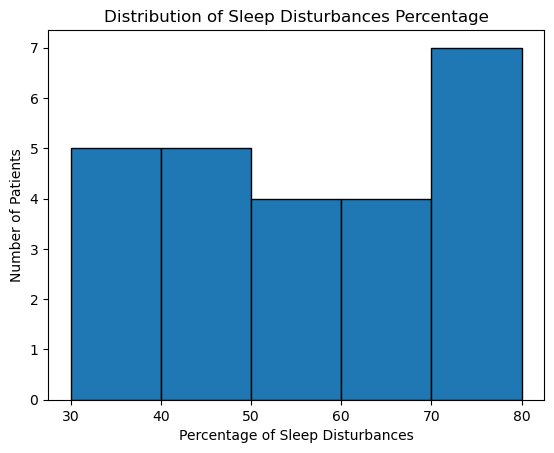

In [17]:
###9.What is the distribution of sleep disturbances percentage?
#Reason:The histogram shows the number of patients that fall into different ranges of sleep disturbances.
#The most common percentage of sleep disturbances is between 60% and 80%, with a significant number of patients at 80%. 
df.groupby('Gender')['Glucose(mg/dl)'].mean()
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = r"D:\Numpy Ninja\Pyhton Hackthon_Aug-2025\Dataset\final_dataset-Hupa.csv"
df = pd.read_csv(file_path)

# Drop duplicates based on 'Patient_id' to get one entry per patient.
unique_patients = df.drop_duplicates(subset=['Patient_id'])

# Create a histogram of the '%_with_sleep_disturbances' column.
plt.hist(unique_patients['%_with_sleep_disturbances'], bins=5, edgecolor='black')

# Add titles and labels.
plt.title('Distribution of Sleep Disturbances Percentage')
plt.xlabel('Percentage of Sleep Disturbances')
plt.ylabel('Number of Patients')

# Save the plot.
plt.savefig('sleep_disturbances_distribution.png')

Mean Glucose Level: 132.61 mg/dl
95% Confidence Interval: [104.15, 161.07]


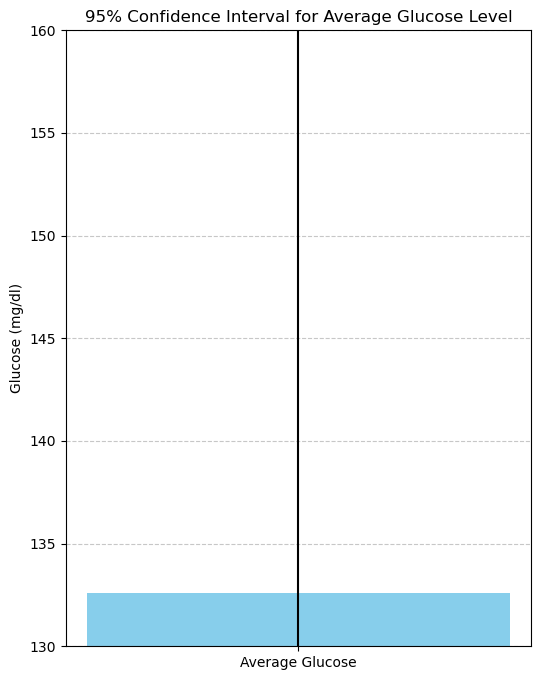

In [18]:
###10.What is the 95% confidence interval for average glucose levels?
# Reason:Based on the data, the 95% confidence interval for the average glucose level is [104.15 mg/dl, 161.07 mg/dl]. The average glucose level is 132.61 mg/dl.
df['%_with_sleep_disturbances'].value_counts(normalize=True) * 100
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Load dataset
file_path = r"D:\Numpy Ninja\Pyhton Hackthon_Aug-2025\Dataset\final_dataset-Hupa.csv"
df = pd.read_csv(file_path)

# Drop duplicates based on 'Patient_id' to get one entry per patient.
unique_patients = df.drop_duplicates(subset=['Patient_id'])

# Extract glucose data.
glucose_data = unique_patients['Glucose(mg/dl)']

# Calculate sample mean, standard deviation, and sample size.
mean_glucose = glucose_data.mean()
std_dev_glucose = glucose_data.std()
sample_size = glucose_data.count()

# Calculate the standard error of the mean.
standard_error = std_dev_glucose / np.sqrt(sample_size)

# Calculate the 95% confidence interval using a z-score of 1.96.
z_score = 1.96
confidence_interval_low = mean_glucose - z_score * standard_error
confidence_interval_high = mean_glucose + z_score * standard_error

print(f"Mean Glucose Level: {mean_glucose:.2f} mg/dl")
print(f"95% Confidence Interval: [{confidence_interval_low:.2f}, {confidence_interval_high:.2f}]")

# Create a bar chart with an error bar for the confidence interval.
plt.figure(figsize=(6, 8))
plt.bar(['Average Glucose'], [mean_glucose], yerr=[[mean_glucose - confidence_interval_low], [confidence_interval_high - mean_glucose]], capsize=10, color='skyblue')

# Add titles and labels.
plt.title('95% Confidence Interval for Average Glucose Level')
plt.ylabel('Glucose (mg/dl)')
plt.ylim(130, 160) # Set a reasonable y-limit for better visualization.
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot.
plt.savefig('confidence_interval_glucose.png')